In [34]:
import os, shutil

# 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '../datasets/cats_and_dogs/train'

# 소규모 데이터셋을 저장할 디렉터리
base_dir = '../datasets/cats_and_dogs_small'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [35]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [36]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) # 다운샘플링 -> 가중치 개수 줄이기 + 필터의 공간적 계층구조 만들기
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # 이진분류이므로,, sigmoid + 유닛 1개

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 74, 74, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 17, 17, 128)     

In [37]:
from tensorflow.keras import optimizers
# 출력층이 1유닛 sigmoid이므로 손실함수: 이진 크로스엔트로피
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [38]:
# ImageDataGenerator 사용해 디렉토리에서 이미지 읽기
# 네트워크에 이미지 주입하기 위해 데이터 전처리
from keras.preprocessing.image import ImageDataGenerator
# 모든 이미지를 1/225로 스케일 조정
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir, # 타깃 디렉토리
        target_size=(150,150), # 모든 이미지 크기를 150*150으로
        batch_size=20, 
        class_mode='binary') # binary_crossentropy loss함수 사용하기 때문에 이진 레이블

validation_generator = test_datagen.flow_from_directory(
        validation_dir, 
        target_size=(150,150),
        batch_size=20, 
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [39]:
for data_batch, labels_batch in train_generator:
    # 각 배치에는 20개의 샘플(배치크기)
    print('배치 데이터 크기:', data_batch.shape) # 150*150 RGB 이미지 배치
    print('배치 레이블 크기:', labels_batch.shape) # 이진 레이블 배치
    break # 반복 루프 나와야함!

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20,)


In [40]:
# 배치 제네레이터를 사용해 모델 훈련
history = model.fit_generator(
      train_generator,
      # 하나의 에포크 정의하기 위해 제너레이터로부터 얼마나 많은 샘플 뽑을지 지정
      steps_per_epoch=100, # 전체 훈련데이터 2,000개 / train_generator 배치 20개 = 100
      epochs=30, 
      validation_data=validation_generator,
      validation_steps=50) # 전체 검증데이터 1,000개 / validation_generator 배치 20개 = 50

Epoch 1/30


/var/folders/9_/z_nr8_hd32x51b1zx2flsn080000gn/T/ipykernel_16222/1636659114.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-03-21 21:33:22.647840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - ETA: 0s - loss: 0.6843 - acc: 0.5595

2022-03-21 21:33:28.746203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


100/100 [==============================] - 8s 72ms/step - loss: 0.6843 - acc: 0.5595 - val_loss: 0.6615 - val_acc: 0.6260
Epoch 2/30
100/100 [==============================] - 7s 69ms/step - loss: 0.6309 - acc: 0.6530 - val_loss: 0.6283 - val_acc: 0.6540
Epoch 3/30
100/100 [==============================] - 7s 68ms/step - loss: 0.5915 - acc: 0.6905 - val_loss: 0.6078 - val_acc: 0.6640
Epoch 4/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5633 - acc: 0.7045 - val_loss: 0.5880 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5329 - acc: 0.7345 - val_loss: 0.6130 - val_acc: 0.6480
Epoch 6/30
100/100 [==============================] - 7s 69ms/step - loss: 0.5122 - acc: 0.7460 - val_loss: 0.5960 - val_acc: 0.6890
Epoch 7/30
100/100 [==============================] - 7s 69ms/step - loss: 0.4922 - acc: 0.7580 - val_loss: 0.5641 - val_acc: 0.7020
Epoch 8/30
100/100 [==============================] - 7s 69ms/step - loss: 0.464

In [41]:
# 훈련 끝나면 모델 저장
model.save('cats_and_dogs_small_1.h5')

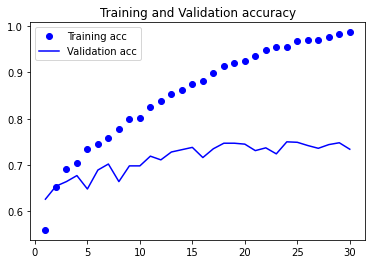

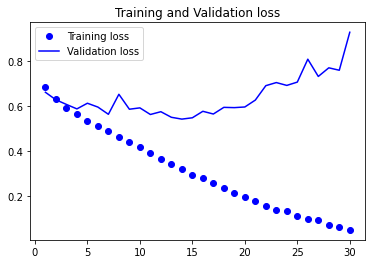

In [42]:
# 훈련 정확도 & 손실 그래프 그리기
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [43]:
# 데이터 증식
datagen = ImageDataGenerator(
        rotation_range=20, # 랜덤하게 사진 회전 각도
        # 사진 수평, 수직으로 핸덤 평행이동(전체 너비와 높이에 대한 비율)
        width_shift_range=0.1, 
        height_shift_range=0.1,
        # 랜덤하게 전단변환
        shear_range=0.1,
        # 랜덤 사진확대
        zoom_range=0.1,
        # 수평 뒤집기
        horizontal_flip=True,
        # 이동으로 인해 새로 픽셀 어떻게 생성할지(주변에 있는 픽셀로 채우기)
        fill_mode='nearest')

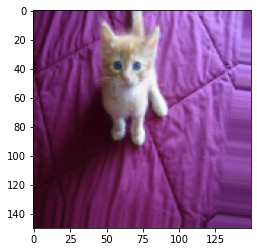

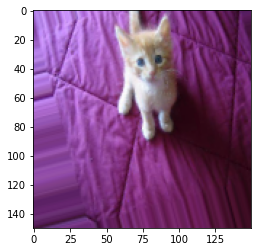

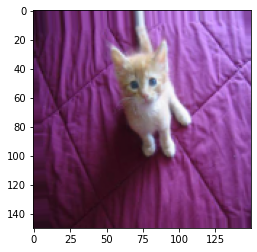

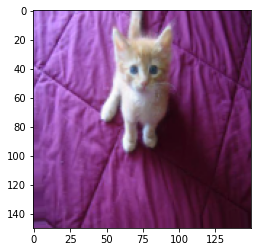

In [44]:
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for
                fname in os.listdir(train_cats_dir)])

img_path = fnames[4] # 증식할 이미지 선택

img = image.load_img(img_path, target_size=(150,150)) # 이미지 읽고 크기 변경

x = image.img_to_array(img) # (150,150,3)크기의 넘파이 배열로 변환
x = x.reshape((1,)+x.shape) # (1,150,150,3)크기로 변환

i = 0
# 랜덤하게 변환된 이미지 배치 생성
# 무한 반복되기 때문에 중지 시점 정해주기!
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break
plt.show()

In [75]:
# 드롭아웃 포함한 모델 정의
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu',
                       input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2))) 
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # 완전 연결층 전에 드롭아웃층 추가
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [79]:
# 데이터 증식 제네레이터를 사용해 컨브넷 훈련
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# 검증 데이터는 증식 X (테스트 세트도)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, # steps_per_epoch * batch_size가 전체 데이터 사이즈보다 크면 오류(버전문제)
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100


/var/folders/9_/z_nr8_hd32x51b1zx2flsn080000gn/T/ipykernel_16222/573863510.py:26: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 9s 85ms/step - loss: 0.6733 - acc: 0.5745 - val_loss: 0.6644 - val_acc: 0.5560
Epoch 2/100
100/100 [==============================] - 8s 84ms/step - loss: 0.6526 - acc: 0.5955 - val_loss: 0.6411 - val_acc: 0.6350
Epoch 3/100
100/100 [==============================] - 8s 82ms/step - loss: 0.6418 - acc: 0.6265 - val_loss: 0.6217 - val_acc: 0.6460
Epoch 4/100
100/100 [==============================] - 8s 83ms/step - loss: 0.6218 - acc: 0.6400 - val_loss: 0.6181 - val_acc: 0.6400
Epoch 5/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6141 - acc: 0.6590 - val_loss: 0.6012 - val_acc: 0.6690
Epoch 6/100
100/100 [==============================] - 8s 80ms/step - loss: 0.6008 - acc: 0.6750 - val_loss: 0.6244 - val_acc: 0.6420
Epoch 7/100
100/100 [==============================] - 8s 80ms/step - loss: 0.5971 - acc: 0.6690 - val_loss: 0.5800 - val_acc: 0.6880
Epoch 8/100
100/100 [==============================] - 8s 80ms/step - loss

Epoch 62/100
100/100 [==============================] - 8s 80ms/step - loss: 0.4122 - acc: 0.8065 - val_loss: 0.4803 - val_acc: 0.7710
Epoch 63/100
100/100 [==============================] - 8s 80ms/step - loss: 0.4131 - acc: 0.8185 - val_loss: 0.4421 - val_acc: 0.8060
Epoch 64/100
100/100 [==============================] - 8s 81ms/step - loss: 0.4151 - acc: 0.8075 - val_loss: 0.5358 - val_acc: 0.7480
Epoch 65/100
100/100 [==============================] - 8s 80ms/step - loss: 0.4117 - acc: 0.8085 - val_loss: 0.4505 - val_acc: 0.7900
Epoch 66/100
100/100 [==============================] - 8s 80ms/step - loss: 0.4134 - acc: 0.8045 - val_loss: 0.4486 - val_acc: 0.7970
Epoch 67/100
100/100 [==============================] - 8s 81ms/step - loss: 0.4086 - acc: 0.8150 - val_loss: 0.5076 - val_acc: 0.7830
Epoch 68/100
100/100 [==============================] - 8s 80ms/step - loss: 0.4147 - acc: 0.8140 - val_loss: 0.4347 - val_acc: 0.8120
Epoch 69/100
100/100 [==============================] -

In [80]:
model.save('cats_and_dogs_small_2.h5')

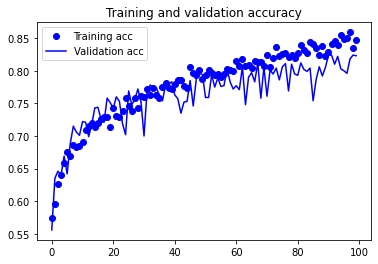

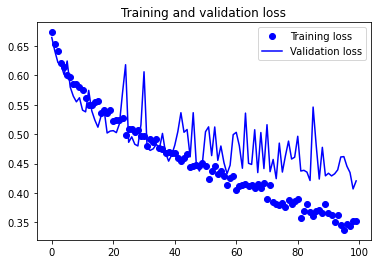

In [92]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()